In [64]:
import pandas as pd
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [96]:
Data = pd.read_csv("data/covid_data.csv")#.query("geold == 'ES'")
# Solo España
Data = Data.query("countriesAndTerritories == 'Spain'")
Data = Data.reset_index()

# Solo fecha y casos
Data = Data[['dateRep','cases']]

# Solo hasta 2021
Data.dateRep = pd.to_datetime(Data.dateRep)
Data = Data.loc[Data['dateRep'] < pd.to_datetime('2022-01-01'),:]
Data.columns = ['ds', 'y']
Data = Data.sort_values(by = ['ds'])
Data

C:\Users\Jairo Enrique\AppData\Local\Temp\ipykernel_15812\4016510003.py:10: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,ds,y
930,2020-01-01,1.0
899,2020-01-02,16.0
870,2020-01-03,685.0
839,2020-01-04,5449.0
809,2020-01-05,717.0
...,...,...
204,2021-12-27,131408.0
203,2021-12-28,137670.0
202,2021-12-29,130742.0
201,2021-12-30,118347.0


In [98]:
import plotly.graph_objects as go
D = Data.loc[Data['ds'] < pd.to_datetime('2021-12-01'),:]


fig = go.Figure([go.Scatter(x = D['ds'], y = D.y)])
fig.show()

In [139]:
holidays = pd.read_csv("data/Festius_generals_de_Catalunya.csv")

holidays = holidays.query("Any == 2022")

holidays = holidays[['Data', 'Nom del festiu']]

holidays.columns = ['ds', 'holiday']

In [140]:
m = Prophet(changepoint_prior_scale=0.05, holidays=holidays)
m.fit(Data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\prophet\forecaster.py:174: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

18:14:06 - cmdstanpy - INFO - Chain [1] start processing
18:14:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1091,2022-12-27,110339.673399,85400.896932,139045.998817
1092,2022-12-28,110675.396251,84904.950542,138052.466252
1093,2022-12-29,110375.031608,84085.534166,136898.258493
1094,2022-12-30,110496.565069,84518.252154,137080.909644
1095,2022-12-31,109185.235042,84166.908734,138158.846507


In [145]:
plot_plotly(m, forecast)

In [146]:
plot_components_plotly(m, forecast)

C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\prophet\plot.py:870: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



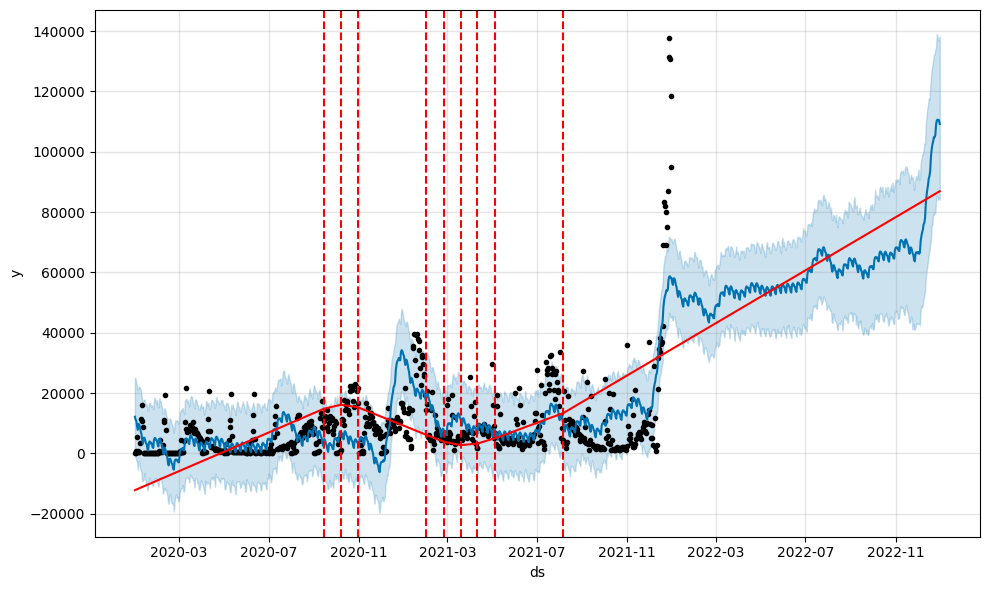

In [147]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [167]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='0 days', period='180 days', horizon = '365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

18:39:50 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:55 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:56 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


In [168]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,4.368402e+09,66093.888904,46173.811637,8.349971,1.410427,0.094801
1,38 days,4.656234e+09,68236.599424,47811.419564,8.349971,1.412919,0.094801
2,39 days,4.925536e+09,70182.161182,49288.414422,8.349971,1.417211,0.100917
3,40 days,5.197235e+09,72091.847822,50880.318773,8.349971,1.436853,0.100917
4,41 days,5.440701e+09,73761.106136,52433.776279,11.344368,1.465976,0.100917


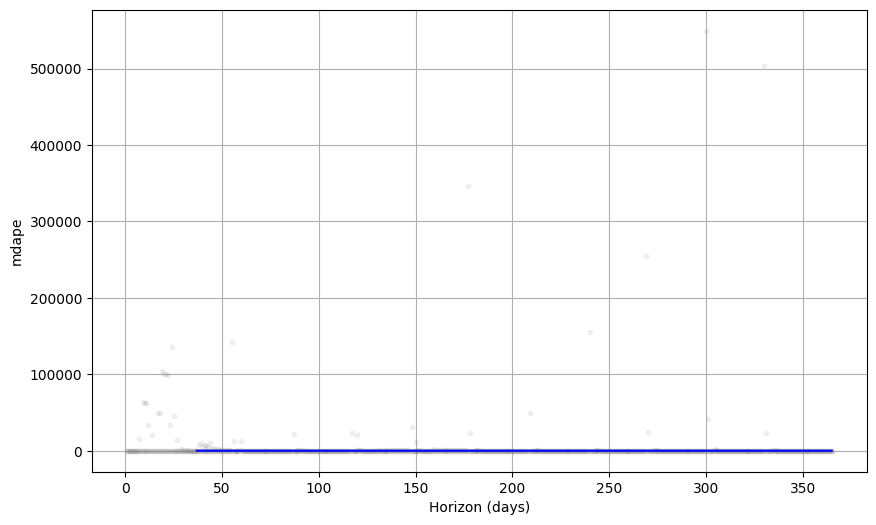

In [170]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')
